In [1]:
from plotting_routines import generate_filename_fRG, change_prefix, plot_fRG, generate_label
import numpy as np
import matplotlib.pyplot as plt
import h5py

path_fRG = "../Data/"
path_NRG = path_fRG

ea = "error_analysis_"
PC = "parquet_check_"

In [2]:
def add_PC_to(labels):
    PC_labels = []
    for label in labels:
        s = list(label)
        s.insert(1, '\mathrm{PC}_{')
        s.insert(-1, '}')
        PC_labels.append("".join(s))
        
    return PC_labels

In [3]:
Volt = 0.0
Temp = 0.01

In [6]:
K1    = generate_filename_fRG(path_fRG, 1,1, V=Volt)
K1_sf = generate_filename_fRG(path_fRG, 1,1, sf=True, V=Volt)
K2_1L = generate_filename_fRG(path_fRG, 2,1, V=Volt)
K2_2L = generate_filename_fRG(path_fRG, 2,2, V=Volt)

K1_PC    = change_prefix(path_fRG, PC, K1)
K2_1L_PC = change_prefix(path_fRG, PC, K2_1L)
K2_2L_PC = change_prefix(path_fRG, PC, K2_2L)

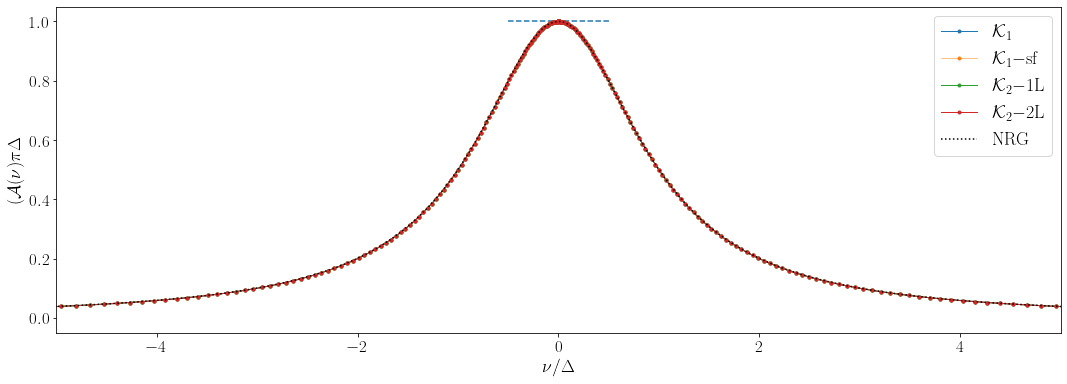

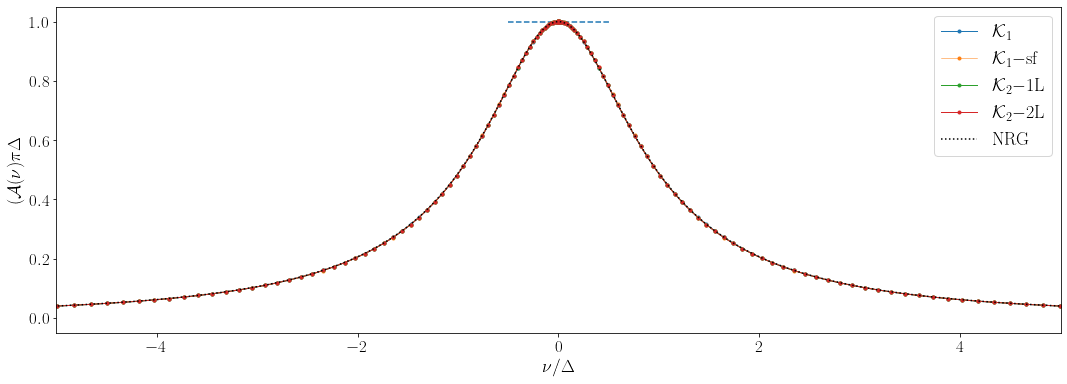

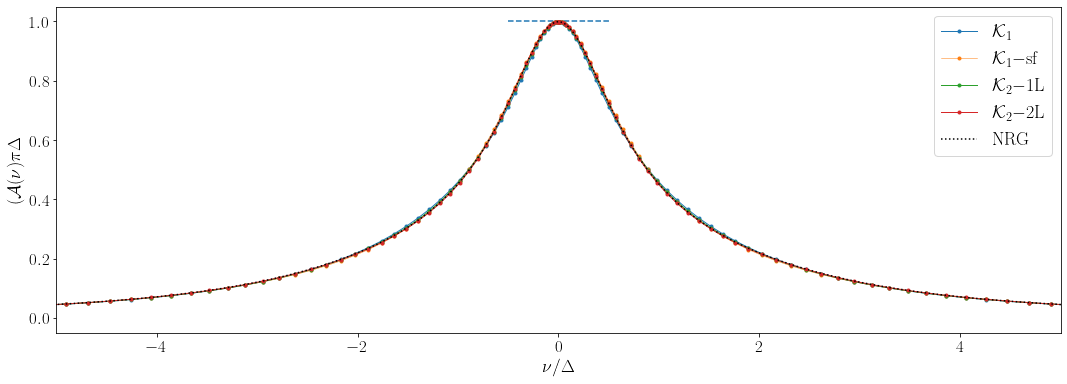

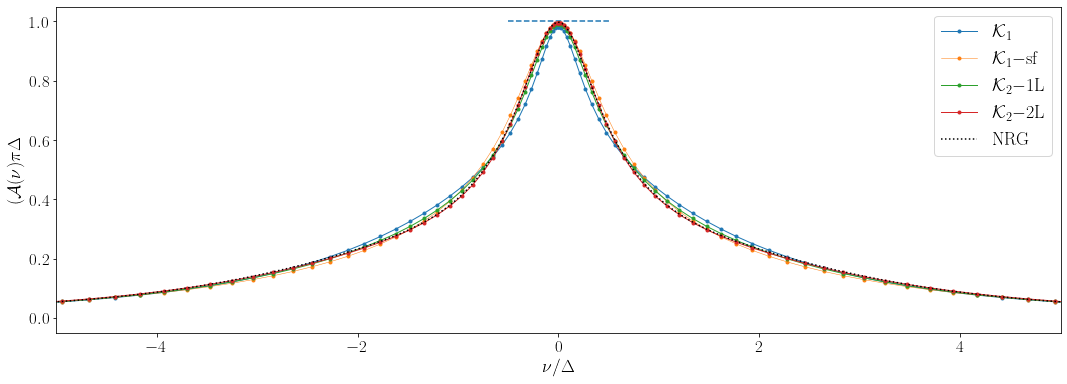

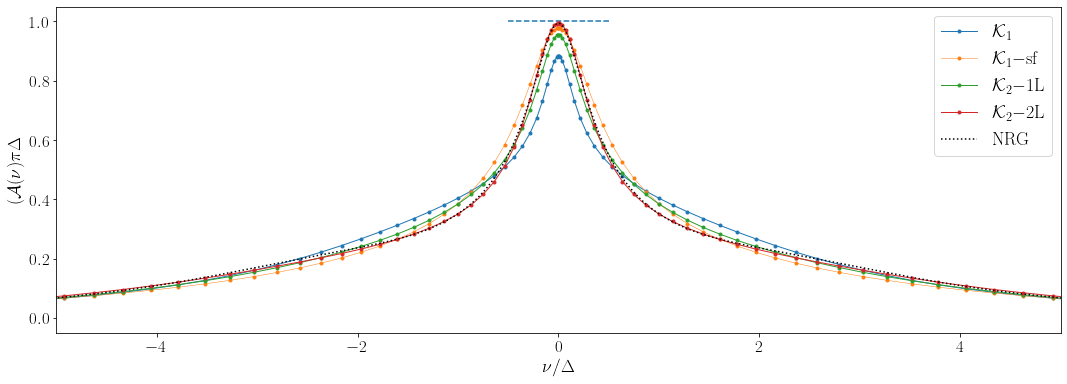

Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813
Actual U/Delta-value = 4.979471512738813


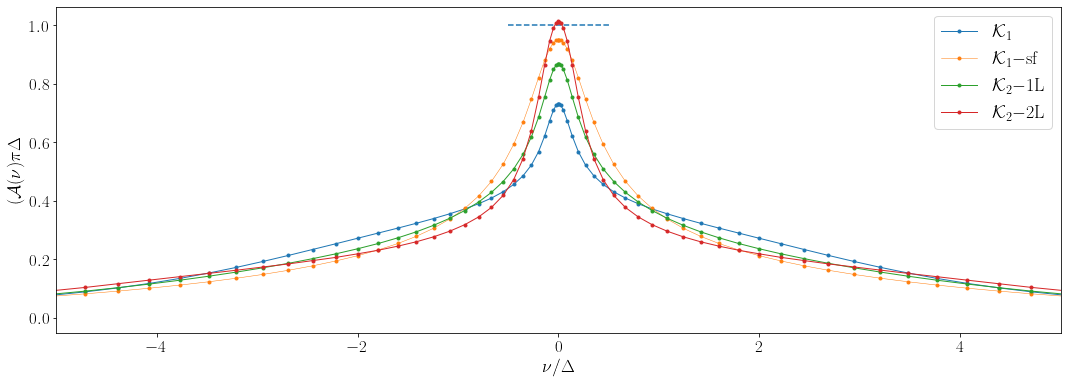

Actual U/Delta-value = 5.792407614693644
Actual U/Delta-value = 5.792407614693644
Actual U/Delta-value = 5.792407614693644
Actual U/Delta-value = 5.792407614693644


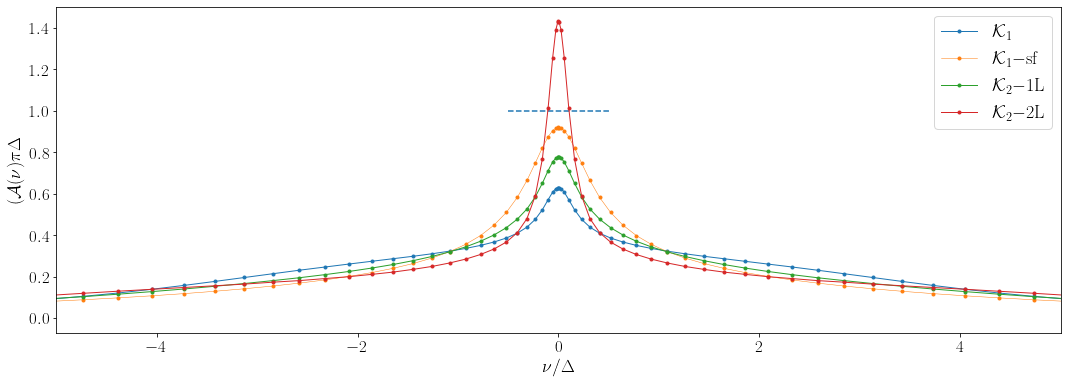

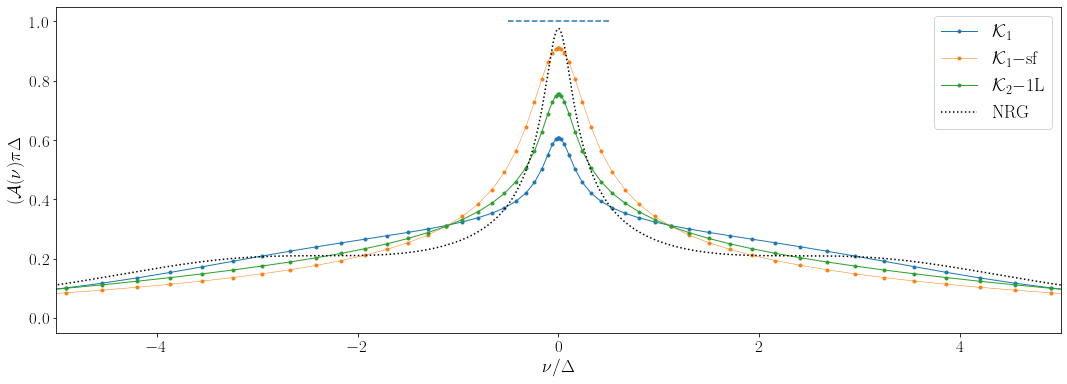

In [17]:
U_list = [0.1, 0.5, 1, 1.5, 2, 2.5, 2.9, 3]
typ = "A"
iK = 1
ins = False

comp = ['R', 'K']

for U_NRG in U_list:
    
    filenames = [K1, K1_sf, K2_1L]
    PC_filenames = [K1_PC, K2_1L_PC]#, K2_2L_PC]
    if U_NRG != 3:
        filenames.append(K2_2L)
        #PC_filenames.append(K2_2L_PC)

    labels = generate_label(path_fRG, filenames)
    #PC_labels = add_PC_to(generate_label(PC_filenames))

    #filenames += PC_filenames
    #labels += PC_labels



    NRG_info = [U_NRG, path_NRG, (Temp==0.01 and Volt==0)]
    fig, ax = plot_fRG(typ, iK, filenames, labels, NRG_info, inset=ins)

    Delta = 0.5

    plt.show()

    figname = typ+ comp[iK] + str(U_NRG/Delta) + "_"
    if Volt != 0:
        figname += "V=" + "%.2f" % Volt
    elif Temp != 0.01:
        figname += "T=" + "%.2f" % Temp
    figname += ".pdf"

    fig.savefig(figname)